In [1]:
# 라이브러리를 불러옵니다.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
# 데이터를 불러옵니다.
df = pd.read_csv('./data/anti_depressant_prescription.csv')

In [4]:
# 데이터의 첫 다섯 줄을 출력합니다.
print(df.shape)
df.head()

(160683, 15)


,기준년도,가입자일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자
0,2017,62,7819529,2,1,12,41,20170711,242901ATB,2.0,1,28,40.0,2240,20181126
1,2017,62,35429246,2,1,12,41,20170808,242901ATB,2.0,1,28,40.0,2240,20181126
2,2017,62,37765102,5,1,12,41,20170609,242901ATB,2.0,1,28,40.0,2240,20181126
3,2017,62,59976553,5,1,12,41,20170911,242901ATB,2.0,1,28,40.0,2240,20181126
4,2017,107,21130660,1,1,11,47,20171017,495501ACE,1.0,1,30,404.0,12120,20181126


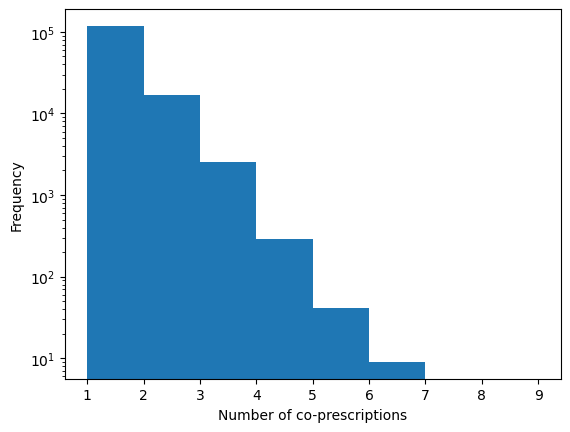

In [5]:
# 처방내역일련번호로 그룹화하여 처방된 약품의 개수를 세어봅니다.
prescription_counts = df.groupby('처방내역일련번호')['약품일반성분명코드'].count()

# 처방된 약품의 개수를 히스토그램으로 그립니다.
plt.hist(prescription_counts, bins=range(1, 10))
plt.xlabel('Number of co-prescriptions')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

In [6]:
prescription_counts[prescription_counts == 5]

처방내역일련번호
298526      5
2630689     5
3406415     5
4107288     5
4814734     5
7957745     5
10185248    5
11090555    5
13809420    5
14018389    5
17245241    5
17579347    5
18263457    5
21683103    5
22259600    5
22287393    5
23999826    5
25590874    5
26198617    5
28747834    5
29581445    5
31145083    5
31378158    5
31451052    5
32492344    5
34136189    5
35446646    5
36661325    5
37051055    5
37077537    5
37916464    5
39062256    5
46870404    5
50288541    5
51001226    5
51379793    5
51864679    5
55382091    5
56122172    5
57777875    5
58192376    5
Name: 약품일반성분명코드, dtype: int64

In [7]:
df['일련번호'].describe()

count    160683.000000
mean          3.184120
std           2.095752
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          25.000000
Name: 일련번호, dtype: float64

In [8]:
df[df['처방내역일련번호'] == 2630689]

,기준년도,가입자일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자
17284,2017,103504,2630689,4,1,14,28,20170609,203401ATB,1.0,1,28,49.0,1372,20181126
17285,2017,103504,2630689,5,1,14,28,20170609,203401ATB,2.0,1,28,49.0,2744,20181126
17286,2017,103504,2630689,7,1,14,28,20170609,242902ATB,4.0,1,28,84.0,9408,20181126
17287,2017,103504,2630689,8,1,14,28,20170609,495501ACE,1.0,1,28,404.0,11312,20181126
17288,2017,103504,2630689,10,1,14,28,20170609,196202ATB,1.0,1,28,935.0,26180,20181126


In [9]:
df[df['가입자일련번호'] == 103504]

,기준년도,가입자일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자
17279,2017,103504,298526,4,1,14,28,20170504,203401ATB,1.0,1,28,49.0,1372,20181126
17280,2017,103504,298526,5,1,14,28,20170504,203401ATB,2.0,1,28,49.0,2744,20181126
17281,2017,103504,298526,7,1,14,28,20170504,242902ATB,4.0,1,28,84.0,9408,20181126
17282,2017,103504,298526,8,1,14,28,20170504,495502ACE,1.0,1,28,624.0,17472,20181126
17283,2017,103504,298526,10,1,14,28,20170504,196202ATB,1.0,1,28,935.0,26180,20181126
17284,2017,103504,2630689,4,1,14,28,20170609,203401ATB,1.0,1,28,49.0,1372,20181126
17285,2017,103504,2630689,5,1,14,28,20170609,203401ATB,2.0,1,28,49.0,2744,20181126
17286,2017,103504,2630689,7,1,14,28,20170609,242902ATB,4.0,1,28,84.0,9408,20181126
17287,2017,103504,2630689,8,1,14,28,20170609,495501ACE,1.0,1,28,404.0,11312,20181126
17288,2017,103504,2630689,10,1,14,28,20170609,196202ATB,1.0,1,28,935.0,26180,20181126


In [10]:
# 같이 처방된 약품을 adjacency matrix로 표현합니다.
adjacency_matrix = pd.DataFrame(np.zeros((len(df['약품일반성분명코드'].unique()), len(df['약품일반성분명코드'].unique()))))

# 처방된 약품의 이름을 index와 columns로 사용합니다.
adjacency_matrix.index = df['약품일반성분명코드'].unique()
adjacency_matrix.columns = df['약품일반성분명코드'].unique()

# 열과 행은 처방된 약품을 나타내며, (i, j)번째 원소는 처방된 약품 i와 j가 같이 처방된 횟수를 나타냅니다.
for prescription in df.groupby('처방내역일련번호')['약품일반성분명코드'].unique():
    for i in range(len(prescription)):
        for j in range(i + 1, len(prescription)):
            adjacency_matrix[prescription[i]][prescription[j]] += 1
            adjacency_matrix[prescription[i]][prescription[j]] += 1

In [11]:
adjacency_matrix

,242901ATB,495501ACE,474801ATB,107501ATB,196201ATB,107504ATB,203401ATB,209302ATB,209304ATR,428101ATB,...,193202ACR,193201ACR,161501ATB,196202ATB,226401ATB,209305ATR,242903ATR,196204ATD,193208ACR,136302ACH
242901ATB,0.0,112.0,144.0,178.0,106.0,4.0,80.0,252.0,218.0,18.0,...,0.0,0.0,0.0,44.0,4.0,110.0,50.0,0.0,0.0,2.0
495501ACE,82.0,0.0,14.0,484.0,100.0,76.0,150.0,10.0,12.0,0.0,...,0.0,0.0,0.0,14.0,0.0,0.0,6.0,0.0,0.0,0.0
474801ATB,268.0,30.0,0.0,206.0,62.0,64.0,28.0,4.0,0.0,0.0,...,6.0,30.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,6.0
107501ATB,184.0,282.0,58.0,0.0,50.0,32.0,368.0,176.0,80.0,2.0,...,0.0,0.0,6.0,108.0,0.0,18.0,10.0,0.0,0.0,76.0
196201ATB,174.0,88.0,40.0,44.0,0.0,2.0,44.0,34.0,52.0,2.0,...,0.0,0.0,0.0,138.0,0.0,4.0,8.0,0.0,0.0,2.0
107504ATB,20.0,94.0,32.0,40.0,0.0,0.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
203401ATB,164.0,122.0,110.0,88.0,70.0,0.0,0.0,116.0,22.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0
209302ATB,166.0,46.0,0.0,142.0,10.0,6.0,6.0,0.0,62.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,38.0
209304ATR,134.0,6.0,12.0,66.0,42.0,0.0,2.0,22.0,0.0,20.0,...,0.0,0.0,0.0,2.0,0.0,26.0,34.0,0.0,0.0,0.0
428101ATB,6.0,0.0,0.0,24.0,0.0,0.0,0.0,26.0,0.0,0.0,...,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,50.0


In [12]:
# adjacency matrix를 networkx 그래프로 변환합니다.
G = nx.from_pandas_adjacency(adjacency_matrix)

def my_draw(G, pos, **my_opts):
    options = { #Common drawing options
    'font_size': 8,
    'node_size': 50,
    'node_color': 'lightgreen',
    'edgecolors': 'black'
    }
    plt.figure(figsize=(10,10))
    options.update(my_opts)
    nx.draw(G, pos, **options)

C:\Users\YuHan\AppData\Local\Temp\ipykernel_22916\3785643222.py:14: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, edgelist=[edge], alpha=edge[2] / max_weight)


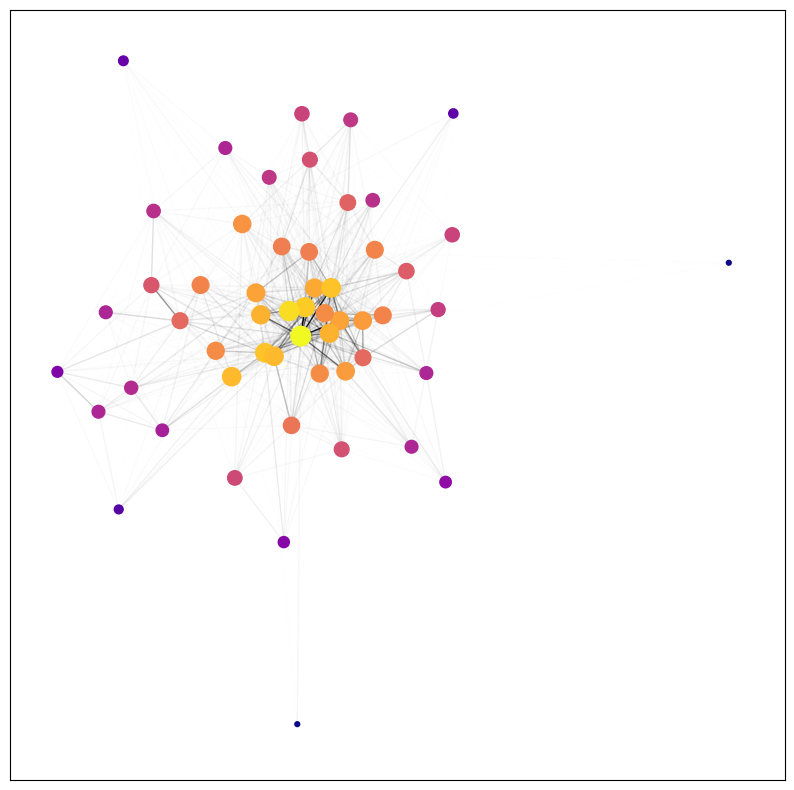

In [18]:
# 그래프를 그립니다.
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, seed=42)

# 노드의 크기를 degree centrality에 비례하게 설정합니다.
node_size = [G.degree(node) * 4 for node in G.nodes]

# 노드의 색을 degree centrality에 비례하게 설정합니다.
node_color = [G.degree(node) for node in G.nodes]

# 엣지의 투명도를 weight에 비례하게 설정합니다.
max_weight = max([d['weight'] for u, v, d in G.edges(data=True)])
for edge in G.edges(data="weight"):
    nx.draw_networkx_edges(G, pos, edgelist=[edge], alpha=edge[2] / max_weight)

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color, cmap=plt.cm.plasma)
plt.show()

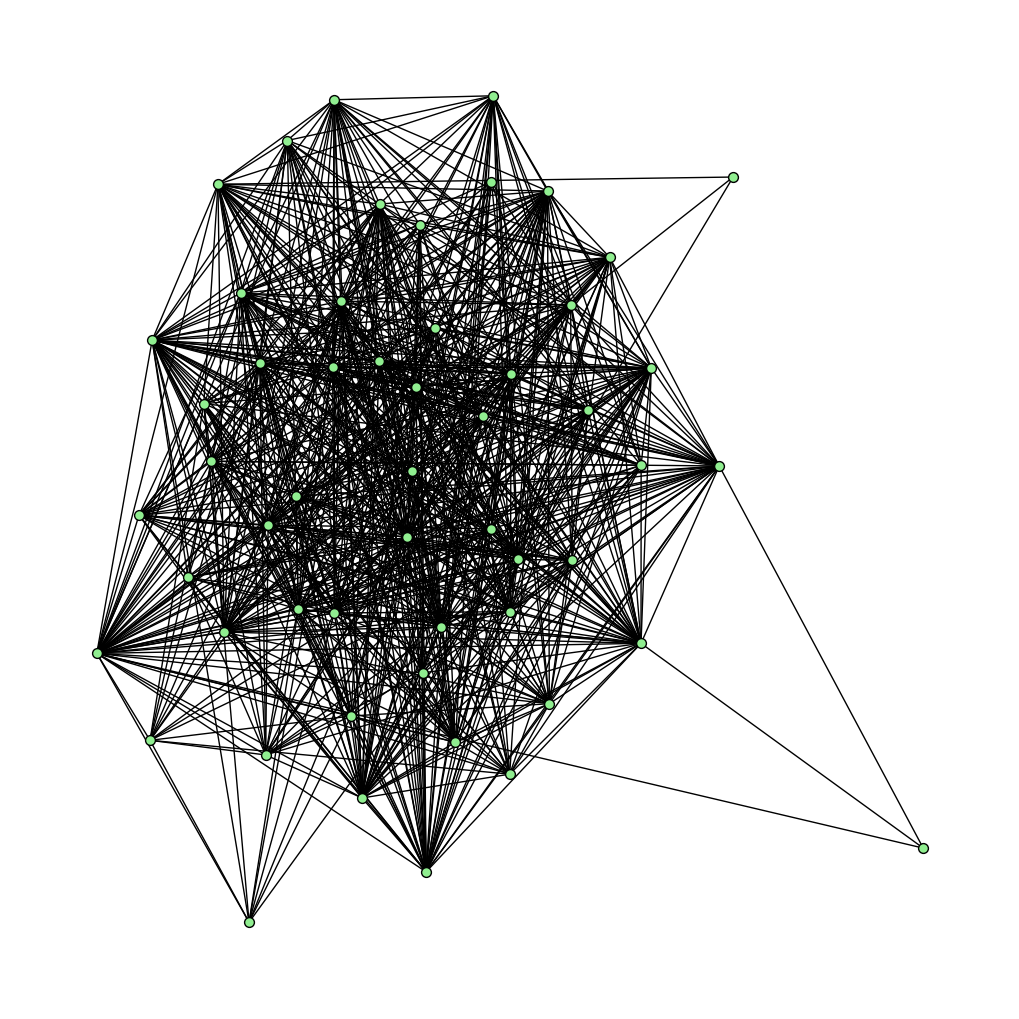

In [22]:
pos = nx.kamada_kawai_layout(G) #positions for all nodes
my_draw(G, pos, with_labels=False)

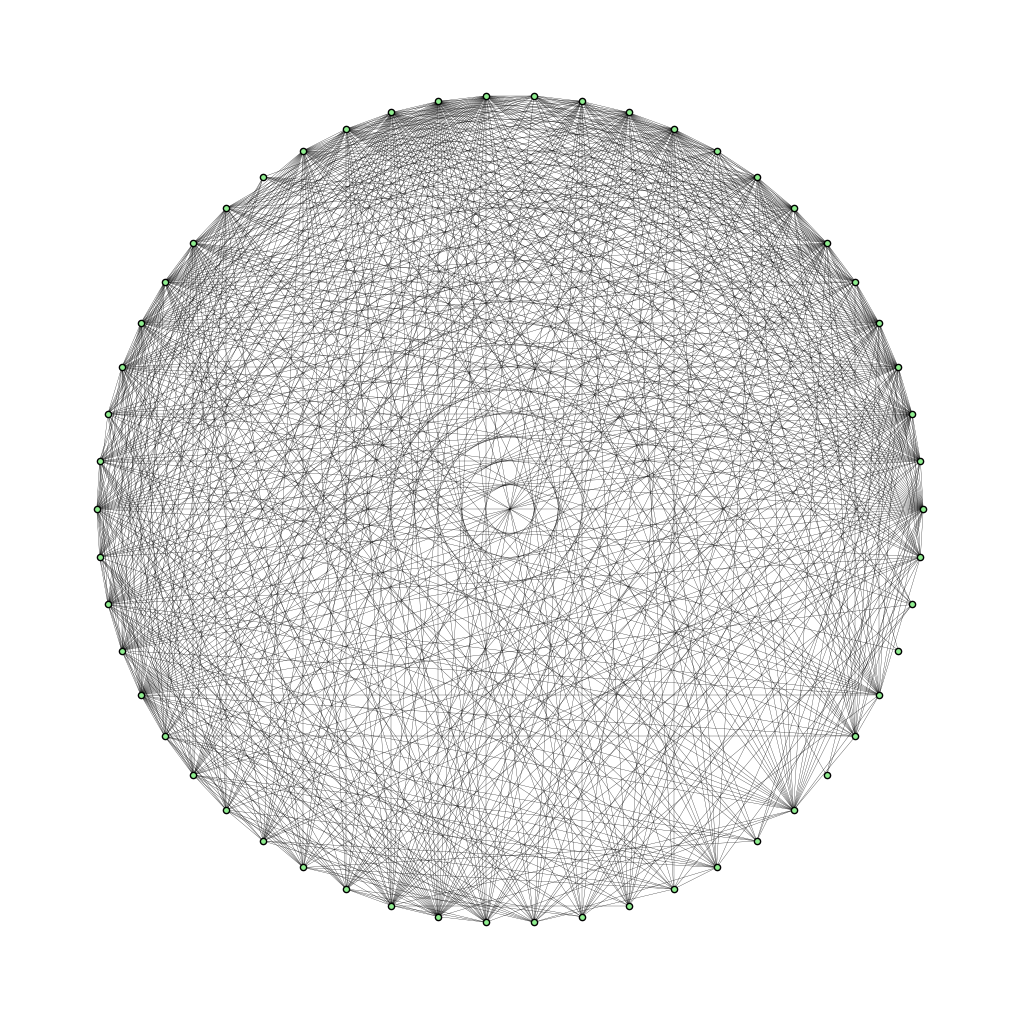

In [23]:
pos = nx.circular_layout(G) #positions for all nodes
my_draw(G, pos, node_size=20, width=0.2)